# TAC Depth Discrimination Analysis: Accuracy Coded by Verbal Judgement Data

In [66]:
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
from scipy.stats import sem 
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
from sklearn.linear_model import LinearRegression


In [67]:
def combineCSVs(datafolder, num_discrim_trials):
    """
    Combine all participant data into one pandas df
    OR 
    Create df for single participant file 
    
    returns:
        (1) combined dataframe of all discrimination data 
        (2) combined dataframe of all scene property rating data 
    """
    #checks if path is a file
    isFile = os.path.isfile(datafolder)

    #checks if path is a directory
    
    isDirectory = os.path.isdir(datafolder)
    
    if isDirectory == True:
        discrim_data = []
        properties_data = []
        for filename in os.listdir(datafolder):
            if 'csv' in filename:
                path = datafolder + "/" + filename
                df = pd.read_csv(path, index_col=None, header=0)
                
                df_discrim = df[0:num_discrim_trials]
                discrim_data.append(df_discrim)
                # row 96 should be ignored - artifact of logging 
                df_properties = df[num_discrim_trials+1:]
                properties_data.append(df_properties)
                

        discrim_frame = pd.concat(discrim_data, axis=0, ignore_index=True)
        properties_frame = pd.concat(properties_data, axis=0, ignore_index=True)
        
    if isFile == True:
        if 'csv' in datafolder:
            df = pd.read_csv(datafolder, index_col=None, header=0)
            df_discrim = df[0:num_discrim_trials]
            discrim_data.append(df_discrim)
            # row 96 should be ignored - artifact of logging 
            df_properties = df[num_discrim_trials+1:]
            properties_data.append(df_properties)
 
    return discrim_frame, properties_frame

In [68]:
data_path = '/Users/prachimahableshwarkar/Documents/GW/FacialAge/FacialAge_MTurk/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/data'

# data_path = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_discrimination/TAC_depth_discrimination_MTurk/data'

# data_path = '/Users/prachi/Documents/depth_duration/depth_discrimination/TAC_depth_discrimination_MTurk/data'

# data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/TAC_depth_discrimination_MTurk/data'


In [69]:
raw_discrim, raw_ratings = combineCSVs(data_path, 100)

In [70]:
all_subjIDs = raw_discrim.subjID.unique()
len(all_subjIDs)

116

In [71]:
all_ages = raw_discrim.age.unique()
all_ages

array([24, 29, 50, 38, 45, 31, 32, 43, 34, 25, 52, 36, 35, 33, 44, 58, 47,
       53, 30, 41, 27, 46, 62, 49, 57, 60, 37, 55, 67, 40, 63, 59, 28, 56])

## <font color='red'> Data Cleaning </font> 



In [76]:
def catchTrial_cleaning(df, correct_requirement, catch_stimuli):
    '''
    Participants complete 8 catch trials total to ensure that they are doing the task.
    If less than 7/8 catch trials are correct, the participant is excluded.  
    '''
    all_subjIDs = df.subjID.unique()
    remove = []
    subj_sequence = {}
    df2_list = []
    sequence_count = {'discrim_jsons/Discrim250_randls_33.json': 0,
 'discrim_jsons/Discrim250_randls_25.json': 0,
 'discrim_jsons/Discrim250_randls_44.json': 0,
 'discrim_jsons/Discrim250_randls_13.json': 0,
 'discrim_jsons/Discrim250_randls_7.json': 0,
 'discrim_jsons/Discrim250_randls_29.json': 0,
 'discrim_jsons/Discrim250_randls_28.json': 0,
 'discrim_jsons/Discrim250_randls_6.json': 0,
 'discrim_jsons/Discrim250_randls_12.json': 0,
 'discrim_jsons/Discrim250_randls_45.json': 0,
 'discrim_jsons/Discrim250_randls_24.json': 0,
 'discrim_jsons/Discrim250_randls_32.json': 0,
 'discrim_jsons/Discrim250_randls_42.json': 0,
 'discrim_jsons/Discrim250_randls_15.json': 0,
 'discrim_jsons/Discrim250_randls_39.json': 0,
 'discrim_jsons/Discrim250_randls_1.json': 0,
 'discrim_jsons/Discrim250_randls_19.json': 0,
 'discrim_jsons/Discrim250_randls_35.json': 0,
 'discrim_jsons/Discrim250_randls_23.json': 0,
 'discrim_jsons/Discrim250_randls_22.json': 0,
 'discrim_jsons/Discrim250_randls_34.json': 0,
 'discrim_jsons/Discrim250_randls_18.json': 0,
 'discrim_jsons/Discrim250_randls_38.json': 0,
 'discrim_jsons/Discrim250_randls_0.json': 0,
 'discrim_jsons/Discrim250_randls_14.json': 0,
 'discrim_jsons/Discrim250_randls_43.json': 0,
 'discrim_jsons/Discrim250_randls_3.json': 0,
 'discrim_jsons/Discrim250_randls_17.json': 0,
 'discrim_jsons/Discrim250_randls_40.json': 0,
 'discrim_jsons/Discrim250_randls_21.json': 0,
 'discrim_jsons/Discrim250_randls_37.json': 0,
 'discrim_jsons/Discrim250_randls_36.json': 0,
 'discrim_jsons/Discrim250_randls_20.json': 0,
 'discrim_jsons/Discrim250_randls_41.json': 0,
 'discrim_jsons/Discrim250_randls_16.json': 0,
 'discrim_jsons/Discrim250_randls_2.json': 0,
 'discrim_jsons/Discrim250_randls_27.json': 0,
 'discrim_jsons/Discrim250_randls_9.json': 0,
 'discrim_jsons/Discrim250_randls_31.json': 0,
 'discrim_jsons/Discrim250_randls_5.json': 0,
 'discrim_jsons/Discrim250_randls_11.json': 0,
 'discrim_jsons/Discrim250_randls_46.json': 0,
 'discrim_jsons/Discrim250_randls_10.json': 0,
 'discrim_jsons/Discrim250_randls_4.json': 0,
 'discrim_jsons/Discrim250_randls_8.json': 0,
 'discrim_jsons/Discrim250_randls_30.json': 0,
 'discrim_jsons/Discrim250_randls_26.json': 0,
 'discrim_jsons/Discrim1000_randls_20.json': 0,
 'discrim_jsons/Discrim1000_randls_7.json': 0,
 'discrim_jsons/Discrim1000_randls_36.json': 0,
 'discrim_jsons/Discrim1000_randls_41.json': 0,
 'discrim_jsons/Discrim1000_randls_16.json': 0,
 'discrim_jsons/Discrim1000_randls_17.json': 0,
 'discrim_jsons/Discrim1000_randls_40.json': 0,
 'discrim_jsons/Discrim1000_randls_37.json': 0,
 'discrim_jsons/Discrim1000_randls_6.json': 0,
 'discrim_jsons/Discrim1000_randls_21.json': 0,
 'discrim_jsons/Discrim1000_randls_10.json': 0,
 'discrim_jsons/Discrim1000_randls_26.json': 0,
 'discrim_jsons/Discrim1000_randls_1.json': 0,
 'discrim_jsons/Discrim1000_randls_30.json': 0,
 'discrim_jsons/Discrim1000_randls_31.json': 0,
 'discrim_jsons/Discrim1000_randls_0.json': 0,
 'discrim_jsons/Discrim1000_randls_27.json': 0,
 'discrim_jsons/Discrim1000_randls_11.json': 0,
 'discrim_jsons/Discrim1000_randls_46.json': 0,
 'discrim_jsons/Discrim1000_randls_12.json': 0,
 'discrim_jsons/Discrim1000_randls_45.json': 0,
 'discrim_jsons/Discrim1000_randls_28.json': 0,
 'discrim_jsons/Discrim1000_randls_32.json': 0,
 'discrim_jsons/Discrim1000_randls_3.json': 0,
 'discrim_jsons/Discrim1000_randls_24.json': 0,
 'discrim_jsons/Discrim1000_randls_25.json': 0,
 'discrim_jsons/Discrim1000_randls_2.json': 0,
 'discrim_jsons/Discrim1000_randls_33.json': 0,
 'discrim_jsons/Discrim1000_randls_29.json': 0,
 'discrim_jsons/Discrim1000_randls_44.json': 0,
 'discrim_jsons/Discrim1000_randls_13.json': 0,
 'discrim_jsons/Discrim1000_randls_18.json': 0,
 'discrim_jsons/Discrim1000_randls_34.json': 0,
 'discrim_jsons/Discrim1000_randls_5.json': 0,
 'discrim_jsons/Discrim1000_randls_22.json': 0,
 'discrim_jsons/Discrim1000_randls_14.json': 0,
 'discrim_jsons/Discrim1000_randls_43.json': 0,
 'discrim_jsons/Discrim1000_randls_38.json': 0,
 'discrim_jsons/Discrim1000_randls_9.json': 0,
 'discrim_jsons/Discrim1000_randls_8.json': 0,
 'discrim_jsons/Discrim1000_randls_39.json': 0,
 'discrim_jsons/Discrim1000_randls_42.json': 0,
 'discrim_jsons/Discrim1000_randls_15.json': 0,
 'discrim_jsons/Discrim1000_randls_23.json': 0,
 'discrim_jsons/Discrim1000_randls_4.json': 0,
 'discrim_jsons/Discrim1000_randls_35.json': 0,
 'discrim_jsons/Discrim1000_randls_19.json': 0}
    
    for subj in all_subjIDs:
#         print(subj)
        count_correct = 0
        subj_df = df.loc[df['subjID'] == subj]
        cleaned_subj_df = subj_df.copy(deep=True) # prevent setting with copy warning
        # 
        subj_sequence[subj] = subj_df.sequenceName.unique()[0]
        
        # remove trials that are outside the outlier range
        c = 0
        c_missed = 0
        for idx, row in subj_df.iterrows():
            stim1 = row['stimulus_0']
            stim2 = row['stimulus_1']
            # TEMP SOLUTION FOR RANDOM PHP DATA SAVING PROBLEM 
            if type(stim1) == str:
                if stim1.split('/')[1] in catch_stimuli or stim2.split('/')[1] in catch_stimuli:
                    ####### VERSION WHERE CATCH TRIALS ARE ATTENTION CHECK: IMAGE 1 IS THE SAME AS IMAGE 2
                    c += 1
                    if row["discrim_choice"] == 3:
#                         print(row["discrim_choice"])
                        count_correct += 1
#                     else:
#                         print(row["discrim_choice"])
                    # remove catch trial 
                    cleaned_subj_df.drop([idx], inplace=True)
    #                 print(depth0, depth1, correct_choice, choice)
#         print(c_missed, 'Number of catch trials where participants did not see the target')
#         print(c)
#         print(count_correct)
        if count_correct < correct_requirement:
#             print('Number correct:', count_correct)
            remove.append(subj)
        else:
            sequence_count[subj_df.sequenceName.unique()[0]] += 1
        
        df2_list.append(cleaned_subj_df)
    
    df2 = pd.concat(df2_list)
    print("Number of participants that did not pass the catch trial check:", len(remove))
    print("Participants that were removed:",remove)
#     print("Sequences that need to be replaced:")
#     for subj in remove:
#         print(subj_sequence[subj])
#     print("Sequence count:")
#     print(sequence_count)
    for index, row in df2.iterrows():
        if row['subjID'] in remove:
            df2.drop(index, inplace=True)
    
    return df2
    
    

In [77]:
# raw_discrim.stimulus_0

In [78]:
# all_catch_stim = ['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
#               '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
#               '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
#               '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
#               '002364_2014-06-28_20-11-05_260595134347_rgbf000042-resize_0',
#               '002675_2014-06-13_16-08-49_094959634447_rgbf000151-resize_2',
#               '003125_2014-05-12_10-39-22_094959634447_rgbf000100-resize_0',
#               '003395_2014-05-20_15-39-18_094959634447_rgbf000101-resize_0',
#               '000454_2014-06-08_16-37-28_260595134347_rgbf000048-resize_2',
#               '000868_2014-06-09_20-49-52_260595134347_rgbf000064-resize_4',
#               '000953_2014-06-08_11-42-19_260595134347_rgbf000083-resize_0',
#               '001012_2014-06-08_23-19-38_260595134347_rgbf000057-resize_0',
#               '001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
#               '001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
#               '001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
#               '001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']

all_catch_stim = ['000375_2014-06-08_11-17-29_260595134347_rgbf000133-resize_2',
                  '000569_2014-06-09_22-51-47_260595134347_rgbf000141-resize_3',
                  '000787_2014-06-08_22-33-53_260595134347_rgbf000175-resize_1',
                  '002072_2014-06-24_21-48-06_260595134347_rgbf000115-resize_0',
                  '001170_2014-06-17_15-43-44_260595134347_rgbf000096-resize_6',
                  '001222_2014-06-17_16-24-06_260595134347_rgbf000073-resize_0',
                  '001498_2014-06-19_17-45-14_260595134347_rgbf000129-resize_4',
                  '001540_2014-06-20_17-01-05_260595134347_rgbf000086-resize_2']


In [79]:
catch_cleaned_discrim = catchTrial_cleaning(raw_discrim, 7, all_catch_stim)

Number of participants that did not pass the catch trial check: 59
Participants that were removed: [628938.0, 257946.0, 270605.0, 169133.0, 280126.0, 769034.0, 596798.0, 968335.0, 764353.0, 615459.0, 446835.0, 920203.0, 537762.0, 476553.0, 265550.0, 773532.0, 838816.0, 401746.0, 617406.0, 772183.0, 533644.0, 250927.0, 580281.0, 363571.0, 670189.0, 551830.0, 587123.0, 110296.0, 782613.0, 723399.0, 493741.0, 488643.0, 494974.0, 188346.0, 939462.0, 630281.0, 479907.0, 738295.0, 723057.0, 705649.0, 200784.0, 916710.0, 268229.0, 928209.0, 973883.0, 653628.0, 835724.0, 858027.0, 172931.0, 871257.0, 106558.0, 852717.0, 578519.0, 402710.0, 509453.0, 580863.0, 168006.0, 595691.0, 822232.0]


In [80]:
cleaned_ages = catch_cleaned_discrim.age.unique()
cleaned_ages

array([29, 50, 38, 45, 32, 43, 34, 35, 33, 44, 47, 25, 53, 41, 46, 49, 57,
       37, 24, 55, 27, 67, 40, 60, 58, 30, 31, 59, 56, 28])

In [82]:
def RT_cleaning(df, outlier_range, num_trials):
    all_subjIDs = df.subjID.unique()
    remove = []
    df2_list = []
    for subj in all_subjIDs:
        count = 0
        subj_df = df.loc[df['subjID'] == subj]
        cleaned_subj_df = subj_df.copy(deep=True) # prevent setting with copy warning
        
        # calculate subject's average trial RT
        average_trial_RT = subj_df["trial_RT"].mean()
        std_trial_RT = subj_df["trial_RT"].std()
        p_outlier_range = [(average_trial_RT - (3*std_trial_RT)), (average_trial_RT + (3*std_trial_RT))]
        
        # remove trials that are outside the outlier range
        for idx, row in subj_df.iterrows():
            RT = row['trial_RT']
            if RT < outlier_range[0]:
                cleaned_subj_df.drop([idx], inplace=True)
                count += 1
            if RT > outlier_range[1]:
                cleaned_subj_df.drop([idx], inplace=True)
                count += 1
            try:
                if RT < p_outlier_range[0]:
                    cleaned_subj_df.drop([idx], inplace=True)
                    count += 1
                if RT > p_outlier_range[1]:
                    cleaned_subj_df.drop([idx], inplace=True)
                    count += 1
            except:
                pass
#                 print("Trial already removed")
                
        threshold = math.floor(num_trials * 0.1)
        if count >= threshold:
            remove.append(subj)
        
        df2_list.append(cleaned_subj_df)
    
    df2 = pd.concat(df2_list)
    print("Number of Participants with 10% or more trials outside their RT range:", len(remove))
    
    for index, row in df2.iterrows():
        if row['subjID'] in remove:
            df2.drop(index, inplace=True)
    
    return df2


In [83]:

# cleaned_discrim = RT_cleaning(catch_cleaned_discrim, [250,5000], 32)


cleaned_discrim = RT_cleaning(catch_cleaned_discrim, [250,5000], 94)

Number of Participants with 10% or more trials outside their RT range: 2


In [84]:
def finalTrialCountCheck(df, num_trials):
    """
    If more then 10% of a participants data is missing, remove the participant
    """
    #List unique values in the df['subjID'] column\n",
    all_subjIDs = df.subjID.unique()
    remove = []
    for subj in all_subjIDs:
        subj_df = df.loc[df['subjID'] == subj]
        count_trials = len(subj_df.index)
        threshold_trials_remaining = num_trials - math.floor(num_trials * 0.1)
        
        if count_trials <= threshold_trials_remaining:
            remove.append(subj)
    print("Number of Participants with >= 10% trials removed:", len(remove))
    
    for index, row in df.iterrows():
        if row['subjID'] in remove:
            df.drop(index, inplace=True)
    
    print("Number of participants left:",len(df.subjID.unique()))
    
    return df

In [85]:
final_discrim = finalTrialCountCheck(cleaned_discrim, 94)

Number of Participants with >= 10% trials removed: 0
Number of participants left: 55


In [88]:
# sequences that are completed

sampled_urls = final_discrim.url.unique()
sampled_urls

array(['http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#32',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#72',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#43',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#74',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#9',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#64',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#81',
       'http://54.173.230.142/FacialAge/BNav_EC2/DepthDuration/v2_depth_discrimination_MTurk/v2_DepthDiscrim_HTML.html#62',
       'h

<!-- ## Sequences that need replacing

Final N = 192 

Each sequence should have 48 participants -->

In [ ]:
# sequence_count = {}
# for subj in final_discrim.subjID.unique():
#     subj_df = final_discrim.loc[final_discrim['subjID'] == subj]
#     sequence = subj_df.sequenceName.unique()[0]
#     if sequence not in sequence_count.keys():
#         sequence_count[sequence] = 1
#     else:
#         sequence_count[sequence] += 1
        
# sequence_count

Need to collect:

{'discrim_jsons/v2_shuffled_g0_dr.json': 0,

 'discrim_jsons/v2_shuffled_g0_rotated_dr.json': 0,
 
 'discrim_jsons/v2_shuffled_g0_rotated.json': 0,
 
 'discrim_jsons/v2_shuffled_g0.json': 0}

In [27]:
# final list of subjects 
final_discrim.subjID.unique()

array([732287., 169096., 415153., 954281., 460884., 867529., 599222.,
       647515., 528433., 148804., 522038., 848116., 203219., 105706.,
       979339., 976796., 315782., 920738., 673024., 745111., 295021.,
       445907.])

# Correlation with Verbal Report data 

- For each discrimination trial, get the average difference between the verbal report for those scenes 
- Correlate that with the proportion correct for that trial 
- Is there better accuracy for scenes that have a larget percevied depth difference (using the verbal report data)?

## Individual Discriminations

In [28]:
def get_accuracy(df):
    """
    * ACCURACY BASED ON THE KINECT
    args:
        df  
    returns:
        proportion of correct responses, count of correct responses, count of total trials  
    """
    count_correct = 0
    count_incorrect = 0
    count_total = 0
    count_missed = 0
    for idx, row in df.iterrows():
        choice = row["discrim_choice"]
        if choice == 2.0:
            count_missed += 1
        else:    
            count_total += 1
            depth0 = row["actual_depth_0"]
            depth1 = row["actual_depth_1"]
            if depth0 < depth1:
                correct_choice = 0
            if depth0 > depth1:
                correct_choice = 1
            if depth0 == depth1:
                # case where depths are equal 
                correct_choice = None
            if choice == correct_choice:
                count_correct += 1
    
    return count_correct/count_total, count_correct, count_total, count_missed

def get_RT(df):
    """
    args:
        df  
    returns:
        array of RTs, avg RT and std   
    """
    list_RTs = []
    for idx, row in df.iterrows():   
        stimulus_duration = row['log_sceneDuration2']
        RT = row["trial_RT"] - stimulus_duration
        list_RTs.append(RT)
    
    list_RTs = np.array(list_RTs)
    
    return list_RTs, np.mean(list_RTs) ,np.std(list_RTs)

In [29]:
def depth_differences(df):
    """
    args:
        df  
    returns:
        array of depth differences, avg depth differences and std   
    """
    depth_diffs = []
    for idx, row in df.iterrows():
        depth0 = row["actual_depth_0"]
        depth1 = row["actual_depth_1"]
        
        diff = abs(depth0-depth1)
        depth_diffs.append(diff)
    
    depth_diffs = np.array(depth_diffs)
    
    return depth_diffs, np.mean(depth_diffs) ,np.std(depth_diffs)
    

In [30]:
all_depth_diffs = depth_differences(final_discrim)

# add depth difference column to dataframe 
final_discrim.insert(18, "depth_difference", all_depth_diffs[0])

In [31]:
def individual_discrimination_stats(df):
    '''
    Individual discrimination performance and RT 
    '''
    all_stim0 = df.stimulus_0.unique()
    
    stimuli_stats = {}
    for stim0 in all_stim0:
        stim0_df = df.loc[df['stimulus_0'] == stim0]
        other_stim = stim0_df.stimulus_1.unique()[0]
        stim1_df = df.loc[df['stimulus_1'] == stim0]
        # df for a specific discrimination trial (collapsed on stim presentation order)
        stim_df = pd.concat([stim0_df, stim1_df], ignore_index=True)
        stim_250_df = stim_df[stim_df['duration'] == 250.0]
        stim_1000_df = stim_df[stim_df['duration'] == 1000.0] 
        
        stim_depthdiff = stim_df['depth_difference'][0]
        
        stim0_depth = stim_df['actual_depth_0'][0]
        stim1_depth = stim_df['actual_depth_1'][0]
        stim_depthbin = np.mean(np.array([stim0_depth,stim1_depth]))
        
        try:
            stim_acc_250 = get_accuracy(stim_250_df)
            stim_acc_1000 = get_accuracy(stim_1000_df)

            stim_RT_250 = get_RT(stim_250_df)
            stim_RT_1000 = get_RT(stim_1000_df)

            stimuli_stats[stim0] = {'stimulus_1': other_stim,
                                    'accuracy_250': stim_acc_250,
                                    'accuracy_1000': stim_acc_1000,
                                    'avg_depth': stim_depthbin,
                                    'depthdifference': stim_depthdiff, 
                                    'RT_250': stim_RT_250,
                                    'RT_1000': stim_RT_1000}
        except:
            pass
    
    return stimuli_stats

In [32]:
all_discrim_performance = individual_discrimination_stats(final_discrim)


## Load Raw TAC Verbal Judgement Data

In [35]:
# TAC_raw_individual_trial_data_path  = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

TAC_raw_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# TAC_raw_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_raw_individual_trial_data/'

# x data
with open(TAC_raw_individual_trial_data_path + 'X_250.npy' , 'rb') as f:
    TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_500.npy' , 'rb') as f:
    TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'X_750.npy' , 'rb') as f:
    TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'X_1000.npy' , 'rb') as f:
    TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_raw_individual_trial_data_path + 'final_y_250.npy' , 'rb') as f:
    TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_500.npy' , 'rb') as f:
    TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_750.npy' , 'rb') as f:
    TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_y_1000.npy' , 'rb') as f:
    TAC_final_y_1000= np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_250.npy', 'rb') as f:
    TAC_final_stim_250 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_500.npy', 'rb') as f:
    TAC_final_stim_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_750.npy', 'rb') as f:
    TAC_final_stim_750 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'final_stim_1000.npy', 'rb') as f:
    TAC_final_stim_1000 = np.load(f, allow_pickle=True)
    
# std data
with open(TAC_raw_individual_trial_data_path + 'std_250.npy' , 'rb') as f:
    TAC_std_250 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_500.npy' , 'rb') as f:
    TAC_std_500 = np.load(f, allow_pickle=True)
    
with open(TAC_raw_individual_trial_data_path + 'std_750.npy' , 'rb') as f:
    TAC_std_750 = np.load(f, allow_pickle=True)

with open(TAC_raw_individual_trial_data_path + 'std_1000.npy' , 'rb') as f:
    TAC_std_1000 = np.load(f, allow_pickle=True)

## Load Normalized TAC Verbal Judgement Data


In [36]:
# TAC_normed_individual_trial_data_path = '/Users/pmahableshwarkar/Documents/Depth_Project/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

TAC_normed_individual_trial_data_path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

# TAC_normed_individual_trial_data_path = '/Users/prachi/Documents/depth_duration/depth_duration_analysis/TAC_npy_files/TAC_normalized_individual_trial_data/'

# x data
with open(TAC_normed_individual_trial_data_path + 'n_X_250.npy' , 'rb') as f:
    n_TAC_X_250 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_500.npy' , 'rb') as f:
    n_TAC_X_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_X_750.npy' , 'rb') as f:
    n_TAC_X_750 = np.load(f, allow_pickle=True)

with open(TAC_normed_individual_trial_data_path + 'n_X_1000.npy' , 'rb') as f:
    n_TAC_X_1000 = np.load(f, allow_pickle=True)
# y data 
with open(TAC_normed_individual_trial_data_path + 'n_final_y_250.npy' , 'rb') as f:
    n_TAC_final_y_250 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_500.npy' , 'rb') as f:
    n_TAC_final_y_500 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_750.npy' , 'rb') as f:
    n_TAC_final_y_750 = np.load(f, allow_pickle=True)
    
with open(TAC_normed_individual_trial_data_path + 'n_final_y_1000.npy' , 'rb') as f:
    n_TAC_final_y_1000= np.load(f, allow_pickle=True)

# std data
with open(TAC_normed_individual_trial_data_path + 'n_std_250.npy' , 'rb') as f:
    n_TAC_std_250 = np.load(f, allow_pickle=True)


with open(TAC_normed_individual_trial_data_path + 'n_std_1000.npy' , 'rb') as f:
    n_TAC_std_1000 = np.load(f, allow_pickle=True)
    
    
# ste data
with open(TAC_normed_individual_trial_data_path + 'n_ste_250.npy' , 'rb') as f:
    n_TAC_ste_250 = np.load(f, allow_pickle=True)


with open(TAC_normed_individual_trial_data_path + 'n_ste_1000.npy' , 'rb') as f:
    n_TAC_ste_1000 = np.load(f, allow_pickle=True)

# Code depth discrimination correctness by the verbal judgement data 

Create new 'ground truth' answer based on verbal judgement data

Task: Respond which image's target was closer to you

## Normalized VE Data

In [37]:
n_VE_answerkey_250 = {} # corresponding answer key for discrimination trials  

for key in all_discrim_performance.keys():
    targetimg0 = key.split('/')[-1]
    folder0 = targetimg0[:-11]
    depth_dur_path0 = 'depth_duration_stimuli/' + folder0 + '/' + targetimg0
    idx0 = np.where(TAC_final_stim_250 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_250[idx0]
    std0 = n_TAC_std_250[idx0]
    ste0 = n_TAC_ste_250[idx0]
    
    targetimg1 = all_discrim_performance[key]['stimulus_1'].split('/')[-1]
    folder1 = targetimg1[:-11]
    depth_dur_path1 = 'depth_duration_stimuli/' + folder1 + '/' + targetimg1
    idx1= np.where(TAC_final_stim_250 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_250[idx1]
    std1 = n_TAC_std_250[idx1]
    ste1 = n_TAC_ste_250[idx1]

    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1

    n_VE_answerkey_250[key] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1}
    

In [38]:
len(n_VE_answerkey_250), n_VE_answerkey_250['depth_discrimination_stimuli/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png']


(94,
 {'stimulus_1': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png',
  'stimulus_0_avg_estim': 0.833947531883851,
  'stimulus_1_avg_estim': 0.8349206194231183,
  'answer': '002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png',
  'std0': 0.24428101710881583,
  'std1': 0.32001628692629125})

In [39]:
n_VE_answerkey_1000 = {} # corresponding answer key for discrimination trials  

for key in all_discrim_performance.keys():
    targetimg0 = key.split('/')[-1]
    folder0 = targetimg0[:-11]
    depth_dur_path0 = 'depth_duration_stimuli/' + folder0 + '/' + targetimg0
    idx0 = np.where(TAC_final_stim_1000 == depth_dur_path0)[0][0]
    avg_estim_stim0 = n_TAC_final_y_1000[idx0]
    std0 = n_TAC_std_1000[idx0]

    targetimg1 = all_discrim_performance[key]['stimulus_1'].split('/')[-1]
    folder1 = targetimg1[:-11]
    depth_dur_path1 = 'depth_duration_stimuli/' + folder1 + '/' + targetimg1
    idx1= np.where(TAC_final_stim_1000 == depth_dur_path1)[0][0]
    avg_estim_stim1 = n_TAC_final_y_1000[idx1]
    std1 = n_TAC_std_1000[idx1]
    
    if avg_estim_stim0 < avg_estim_stim1:
        # Which target is CLOSER to you?
        answer = targetimg0
    if avg_estim_stim0 == avg_estim_stim1:
        print(targetimg0, targetimg1)
    if avg_estim_stim0 > avg_estim_stim1:
        answer = targetimg1

    n_VE_answerkey_1000[key] = {'stimulus_1': targetimg1,
                             'stimulus_0_avg_estim': avg_estim_stim0,
                             'stimulus_1_avg_estim': avg_estim_stim1,
                             'answer': answer,
                             'std0': std0,
                             'std1': std1}
    

In [40]:
len(n_VE_answerkey_1000), n_VE_answerkey_1000['depth_discrimination_stimuli/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1/002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize_1-target.png']


(94,
 {'stimulus_1': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png',
  'stimulus_0_avg_estim': 0.8866695271052695,
  'stimulus_1_avg_estim': 0.7294604623353301,
  'answer': '001516_2014-06-20_16-25-09_260595134347_rgbf000076-resize_2-target.png',
  'std0': 0.30669074672292423,
  'std1': 0.23543310052962552})

### Save answer keys and final_discrim to external files

In [39]:
import json 

dest = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/depth_discrimination/TAC_discrim_datafiles'

with open(dest + "/n_VE_answerkey_250.json", "w") as outfile:
    json.dump(n_VE_answerkey_250, outfile)
    
with open(dest + "/n_VE_answerkey_1000.json", "w") as outfile:
    json.dump(n_VE_answerkey_1000, outfile)

In [42]:
final_discrim.to_csv(dest + '/TAC_final_discrim.csv') 

### VE Coded Accuracy

In [41]:
def VE_accuracy(stim0, df, answerkey):
    '''
    Accuracy based on the verbal judgement data 
    '''
    
    """
    args:
        df  
    returns:
        proportion of correct responses, count of correct responses, count of total trials  
    """
    count_correct = 0
    count_incorrect = 0
    count_total = 0
    count_missed = 0
    
    VE_correct_answer = answerkey[stim0]['answer']
    for idx, row in df.iterrows(): 
        choice = row["discrim_choice"]
        count_total += 1
        if choice == 0.0:
            image_choice = row["stimulus_0"]
                
        if choice == 1.0:
            image_choice = row["stimulus_1"]
                
        if choice == 2.0:
            count_missed += 1
            
        if choice == 3.0:
            count_missed += 1
        
        try:
            if image_choice.split('/')[-1] == VE_correct_answer:
                count_correct += 1
        except:
            pass
        
#     standardError = (0.5*(1-0.5))/count_total
    p = count_correct/count_total
    standardError = np.sqrt((p*(1-p))/count_total)
    
    return count_correct/count_total, count_correct, count_total, count_missed, standardError

    
def main_VE_accuracy(df, answerkey_250, answerkey_1000):
    all_stim0 = df.stimulus_0.unique()
    
    stimuli_stats = {}
    for stim0 in all_stim0:
        try:
            # dataframe for stimulus 0
            stim0_df = df.loc[df['stimulus_0'] == stim0]
            # name of stimulus 1
            other_stim = stim0_df.stimulus_1.unique()[0]
            # dataframe where stimulus 0 is presented SECOND (same trial)
            stim1_df = df.loc[df['stimulus_1'] == stim0]

            # df for a specific discrimination trial (collapsed on stim presentation order)
            stim_df = pd.concat([stim0_df, stim1_df], ignore_index=True)
            stim_250_df = stim_df[stim_df['duration'] == 250.0]
            stim_1000_df = stim_df[stim_df['duration'] == 1000.0] 

            stim0_depth = stim_df['actual_depth_0'][0]
            stim1_depth = stim_df['actual_depth_1'][0]
            stim_depthbin = np.mean(np.array([stim0_depth,stim1_depth]))

            stim_acc_250 = VE_accuracy(stim0, stim_250_df, answerkey_250)
            stim_acc_1000 = VE_accuracy(stim0, stim_1000_df, answerkey_1000)

            stim_RT_250 = get_RT(stim_250_df)
            stim_RT_1000 = get_RT(stim_1000_df)

            # difference between verbal judgements divided by joint variance 
            # abs(VE1-VE2)/sqrt(stda^2 + std2^2)
            std0_250 = answerkey_250[stim0]['std0']
            std1_250 = answerkey_250[stim0]['std1']
            joint_variance_250 = np.sqrt(std0_250**2 + std1_250**2)
            JV_regressor_250 = abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim'])/joint_variance_250

            std0_1000 = answerkey_1000[stim0]['std0']
            std1_1000 = answerkey_1000[stim0]['std1']
            joint_variance_1000 = np.sqrt(std0_1000**2 + std1_1000**2)
            JV_regressor_1000 = abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim'])/joint_variance_1000

            stimuli_stats[stim0] = {'stimulus_1': other_stim,
                                    'accuracy_250': stim_acc_250,
                                    'accuracy_1000': stim_acc_1000,
                                    'avg_depth': stim_depthbin,
                                    'VE_depthdifference_250': abs(answerkey_250[stim0]['stimulus_0_avg_estim'] - answerkey_250[stim0]['stimulus_1_avg_estim']), 
                                    'VE_depthdifference_1000': abs(answerkey_1000[stim0]['stimulus_0_avg_estim'] - answerkey_1000[stim0]['stimulus_1_avg_estim']),
                                    'RT_250': stim_RT_250,
                                    'RT_1000': stim_RT_1000,
                                    'JV_regressor_250': JV_regressor_250,
                                    'JV_regressor_1000': JV_regressor_1000}
        except:
            print(stim0)

    return stimuli_stats
    

In [42]:
n_all_VE_discrim_performance = main_VE_accuracy(final_discrim, n_VE_answerkey_250, n_VE_answerkey_1000) 

In [43]:
len(n_all_VE_discrim_performance)


94

In [44]:
n_VE_estim_diff_250 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_250'] for elem in n_all_VE_discrim_performance]
n_VE_estim_diff_1000 = [n_all_VE_discrim_performance[elem]['VE_depthdifference_1000'] for elem in n_all_VE_discrim_performance]

n_VE_accuracy_250 = [n_all_VE_discrim_performance[elem]['accuracy_250'][0] for elem in n_all_VE_discrim_performance]
n_VE_accuracy_1000 = [n_all_VE_discrim_performance[elem]['accuracy_1000'][0] for elem in n_all_VE_discrim_performance]

n_VE_ste_250 = [n_all_VE_discrim_performance[elem]['accuracy_250'][-1] for elem in n_all_VE_discrim_performance]
n_VE_ste_1000 = [n_all_VE_discrim_performance[elem]['accuracy_1000'][-1] for elem in n_all_VE_discrim_performance]

n_avg_RT_250 = [n_all_VE_discrim_performance[elem]['RT_250'][1] for elem in n_all_VE_discrim_performance]
n_avg_RT_1000 = [n_all_VE_discrim_performance[elem]['RT_1000'][1] for elem in n_all_VE_discrim_performance]

n_JV_250 = [n_all_VE_discrim_performance[elem]['JV_regressor_250'] for elem in n_all_VE_discrim_performance]
n_JV_1000 = [n_all_VE_discrim_performance[elem]['JV_regressor_1000'] for elem in n_all_VE_discrim_performance]

n_stim = [elem for elem in n_all_VE_discrim_performance]

#### Overall Accuracy: Coded by Normalized VE

In [45]:
np.mean(n_VE_accuracy_250), np.mean(n_VE_accuracy_1000)

(0.732691658223573, 0.7508976838764071)

In [46]:
print('250 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference')
stats.pearsonr(n_VE_accuracy_250, n_VE_estim_diff_250)

250 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference


(0.5565959551357849, 5.707488379549509e-09)

In [47]:
print('1000 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference')
stats.pearsonr(n_VE_accuracy_1000, n_VE_estim_diff_1000)

1000 ms: Correlation between VE discrimination accuracy and average normalized verbal estimate difference


(0.5569917916679402, 5.538505354286643e-09)

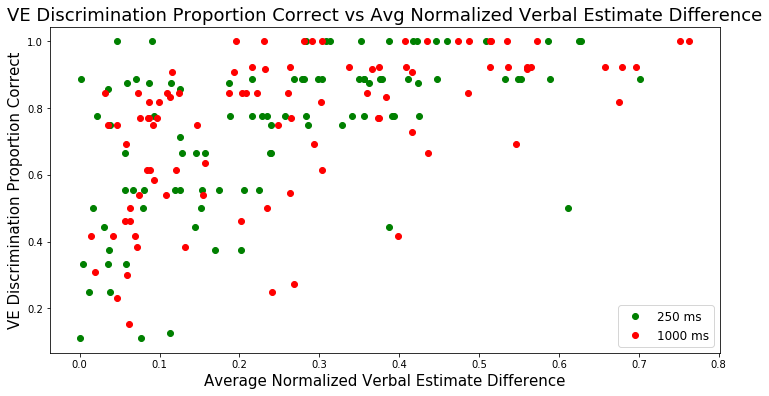

In [48]:
plt.figure(figsize=[12,6])
plt.plot(np.array(n_VE_estim_diff_250), np.array(n_VE_accuracy_250), 'go', label='250 ms')
plt.plot(np.array(n_VE_estim_diff_1000), np.array(n_VE_accuracy_1000), 'ro', label='1000 ms')
plt.xlabel('Average Normalized Verbal Estimate Difference', fontsize=15)
plt.ylabel('VE Discrimination Proportion Correct', fontsize = 15)
plt.legend(fontsize = 12)
plt.title('VE Discrimination Proportion Correct vs Avg Normalized Verbal Estimate Difference', fontsize = 18)
plt.show();

In [49]:
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)

m: [0.73190389]
b: 0.5507386704928255
R-squared:  0.3097990572735163


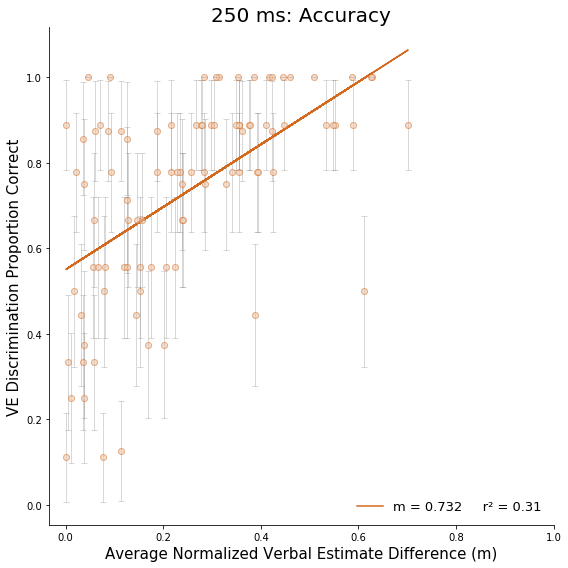

In [50]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)


#run regression
VE_X_250 = np.array(n_VE_estim_diff_250).reshape(-1,1)
VE_PC_250 = n_VE_accuracy_250
VE_PC_reg_250 = LinearRegression().fit(VE_X_250, VE_PC_250)

#Generated Predictions
PC_predicted_250 = VE_PC_reg_250.predict(VE_X_250)
#Plot Our Actual and Predicted Values
plt.errorbar(VE_X_250, VE_PC_250,elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='chocolate', capsize=3, alpha = 0.3, yerr = np.array(n_VE_ste_250));


plt.plot(VE_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(VE_X_250, PC_predicted_250,color='chocolate', label = 'm = ' + str(round(VE_PC_reg_250.coef_[0], 3))
         + '     r' + get_super('2') + ' = '+ str(round(float(VE_PC_reg_250.score(VE_X_250, VE_PC_250)), 3)))
plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(VE_PC_reg_250.coef_))
print("b: {0}".format(VE_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", VE_PC_reg_250.score(VE_X_250, VE_PC_250))

legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

plt.title("250 ms: Accuracy", fontsize = 20)
plt.xticks(np.arange(0,1.2, 0.2))
plt.yticks(np.arange(0,1.2, 0.2))

fig.tight_layout()

plt.show();

In [51]:
# for PC in n_VE_accuracy_250:
#     if PC < 0.2:
#         i = n_VE_accuracy_250.index(PC)
#         print(PC, i)
#         print(n_stim[i])
#         print(all_discrim_performance[n_stim[i]]['stimulus_1'])
#         j = n_stim.index(all_discrim_performance[n_stim[i]]['stimulus_1'])
#         print(n_VE_answerkey_250[n_stim[i]])


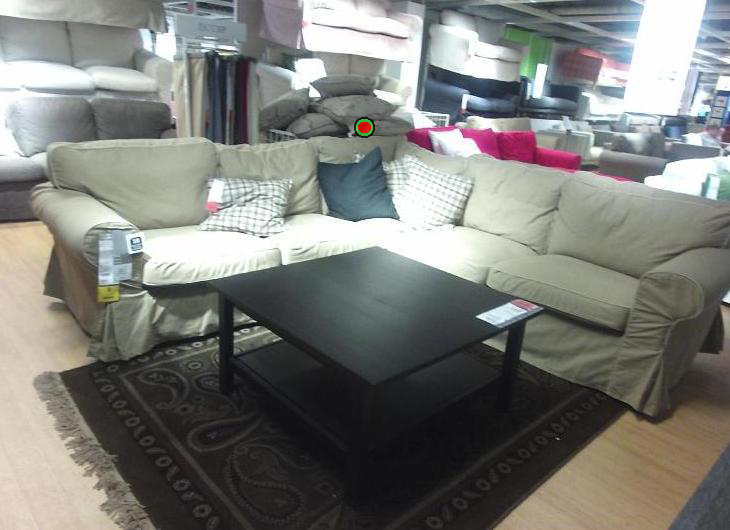
kinect: 3.73; VE: 1.3

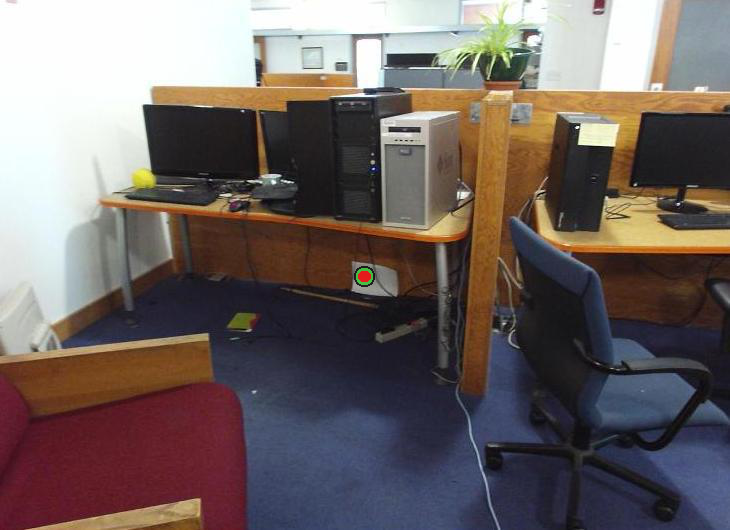
kinect: 3.27 m; VE: 1.44

m: [0.61940327]
b: 0.5826352090138267
R-squared:  0.3102398559854621


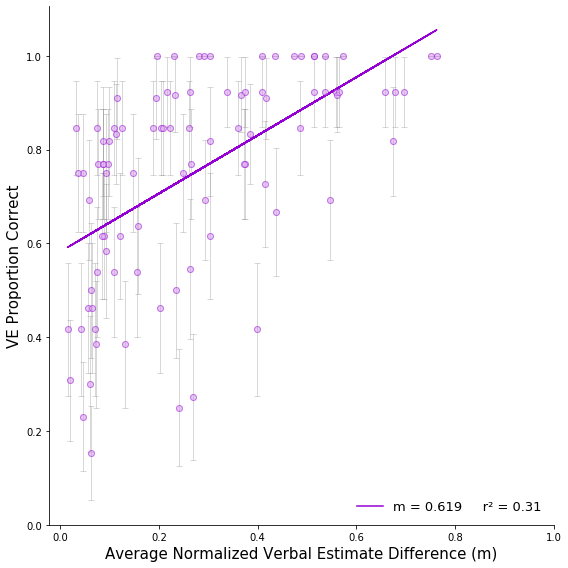

In [52]:
fig, ax = plt.subplots(figsize=[8,8])
right_side = ax.spines['right']
right_side.set_visible(False)
top = ax.spines['top']
top.set_visible(False)


VE_X_1000 = np.array(n_VE_estim_diff_1000).reshape(-1,1)
VE_PC_1000 = n_VE_accuracy_1000
VE_PC_reg_1000 = LinearRegression().fit(VE_X_1000, VE_PC_1000)

#Generated Predictions
PC_predicted_1000 = VE_PC_reg_1000.predict(VE_X_1000)
#Plot Our Actual and Predicted Values
plt.errorbar(VE_X_1000, VE_PC_1000, elinewidth=1, ecolor='gray', fmt='or', mfc='white', mec='darkviolet', capsize=3, alpha = 0.3, yerr = np.array(n_VE_ste_1000));
plt.plot(VE_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(VE_X_1000, PC_predicted_1000,color='darkviolet', label = 'm = ' + str(round(VE_PC_reg_1000.coef_[0], 3))
         + '     r' + get_super('2') + ' = '+ str(round(float(VE_PC_reg_1000.score(VE_X_1000, VE_PC_1000)), 3)))

legend = plt.legend(loc = 4, fontsize=13, labelspacing=1, frameon=False)

#get coefficients and y intercept
print("m: {0}".format(VE_PC_reg_1000.coef_))
print("b: {0}".format(VE_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", VE_PC_reg_1000.score(VE_X_1000, VE_PC_1000))

plt.xlabel("Average Normalized Verbal Estimate Difference (m)", fontsize = 15)
plt.ylabel("VE Proportion Correct", fontsize = 15)


# plt.title("1000 ms: Accuracy", fontsize = 20)

plt.xticks(np.arange(0,1.2, 0.2))
plt.yticks(np.arange(0,1.2, 0.2))

fig.tight_layout()

plt.show();

In [53]:
stats.pearsonr(n_VE_accuracy_250, n_VE_accuracy_1000)

(0.5971001292264198, 2.1241526055646607e-10)

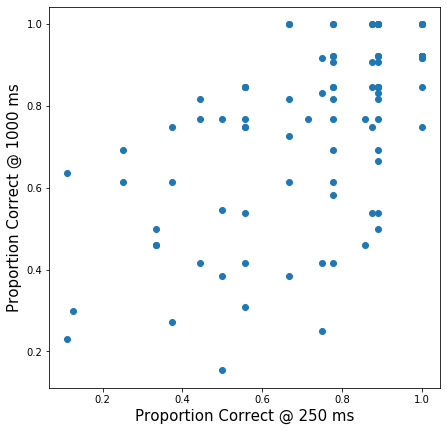

In [54]:
plt.figure(figsize=[7,7])
plt.xlabel('Proportion Correct @ 250 ms', fontsize=15)
plt.ylabel('Proportion Correct @ 1000 ms', fontsize=15)
plt.plot(n_VE_accuracy_250,n_VE_accuracy_1000, 'o' )

# UPDATED REGRESSOR: Difference between verbal judgements divided by joint variance 

In [55]:
print('250 ms: Correlation between VE discrimination accuracy and difference between normalized verbal judgements divided by joint variance ')
stats.pearsonr(n_VE_accuracy_250, n_JV_250)

250 ms: Correlation between VE discrimination accuracy and difference between normalized verbal judgements divided by joint variance 


(0.5566530726784826, 5.682803949644298e-09)

In [56]:
print('1000 ms: Correlation between VE discrimination accuracy and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_VE_accuracy_1000, n_JV_1000)

1000 ms: Correlation between VE discrimination accuracy and difference between verbal judgements divided by joint variance 


(0.5760902072046161, 1.2382974078161466e-09)

m: [0.3755037]
b: 0.5567652367860464
R-squared:  0.30986264332239577


Text(0.5, 1.0, '250 ms')

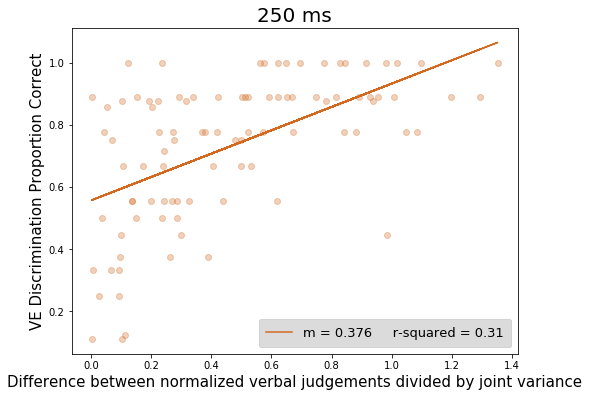

In [57]:
#run regression
plt.figure(figsize=[8,6])
JV_X_250 = np.array(n_JV_250).reshape(-1,1)
VE_PC_250 = n_VE_accuracy_250
JV_PC_reg_250 = LinearRegression().fit(JV_X_250, VE_PC_250)

#Generated Predictions
JV_PC_predicted_250 = JV_PC_reg_250.predict(JV_X_250)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(JV_X_250, JV_PC_predicted_250,color='chocolate', label = 'm = ' + str(round(JV_PC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_250.score(JV_X_250, VE_PC_250)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_250.coef_))
print("b: {0}".format(JV_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_250.score(JV_X_250, VE_PC_250))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("250 ms", fontsize = 20)


m: [0.31819875]
b: 0.5814221526099866
R-squared:  0.3318799268370577


Text(0.5, 1.0, '1000 ms')

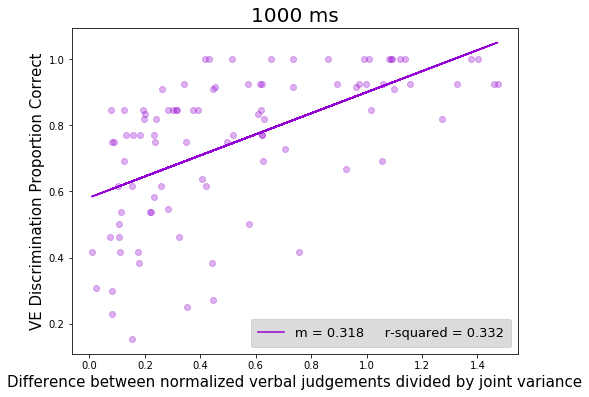

In [65]:
#run regression
plt.figure(figsize=[8,6])
JV_X_1000 = np.array(n_JV_1000).reshape(-1,1)
VE_PC_1000 = n_VE_accuracy_1000
JV_PC_reg_1000 = LinearRegression().fit(JV_X_1000, VE_PC_1000)

#Generated Predictions
JV_PC_predicted_1000 = JV_PC_reg_1000.predict(JV_X_1000)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(JV_X_1000, JV_PC_predicted_1000,color='darkviolet', label = 'm = ' + str(round(JV_PC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("VE Discrimination Proportion Correct", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_1000.coef_))
print("b: {0}".format(JV_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("1000 ms", fontsize = 20)


(0.8140127420805379, 1.993401689013405e-23)


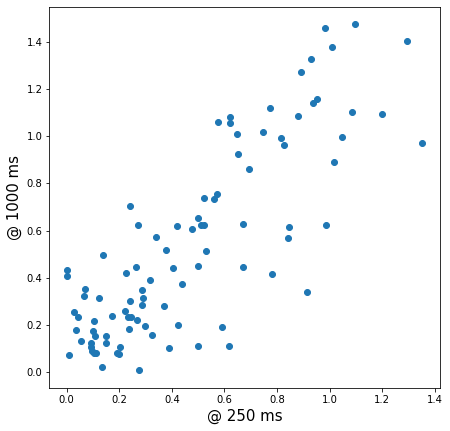

In [60]:
print(stats.pearsonr(n_JV_250, n_JV_1000))
plt.figure(figsize=[7,7])
plt.xlabel('@ 250 ms', fontsize=15)
plt.ylabel('@ 1000 ms', fontsize=15)
plt.plot(n_JV_250,n_JV_1000, 'o' )

In [61]:
print('250 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_avg_RT_250, n_JV_250)

250 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance 


(-0.47069959058241423, 1.688741473818935e-06)

In [62]:
print('1000 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance ')
stats.pearsonr(n_avg_RT_1000, n_JV_1000)

1000 ms: Correlation between average discrimination RT and difference between verbal judgements divided by joint variance 


(-0.060543848428007724, 0.5621354291047205)

m: [-221.41104951]
b: 1330.6839645764678
R-squared:  0.2215581045744525


Text(0.5, 1.0, '250 ms: RT')

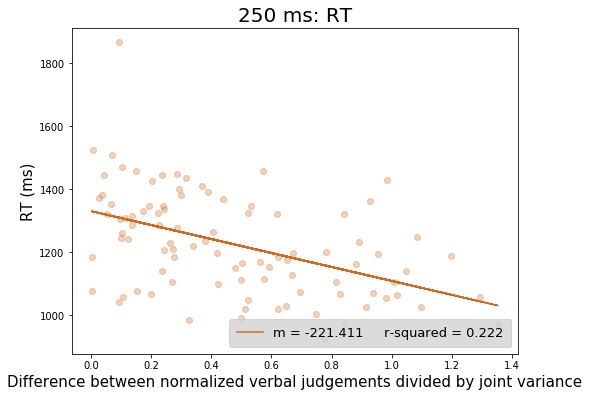

In [63]:
#run regression
plt.figure(figsize=[8,6])
JV_X_250 = np.array(n_JV_250).reshape(-1,1)
VE_PC_250 = n_avg_RT_250
JV_PC_reg_250 = LinearRegression().fit(JV_X_250, VE_PC_250)

#Generated Predictions
JV_PC_predicted_250 = JV_PC_reg_250.predict(JV_X_250)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_250, VE_PC_250, 'o', color='chocolate', alpha = 0.3);
plt.plot(JV_X_250, JV_PC_predicted_250,color='chocolate', label = 'm = ' + str(round(JV_PC_reg_250.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_250.score(JV_X_250, VE_PC_250)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_250.coef_))
print("b: {0}".format(JV_PC_reg_250.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_250.score(JV_X_250, VE_PC_250))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("250 ms: RT", fontsize = 20)

m: [-16.51168127]
b: 1111.4397809674267
R-squared:  0.0036655575824731113


Text(0.5, 1.0, '1000 ms: RT')

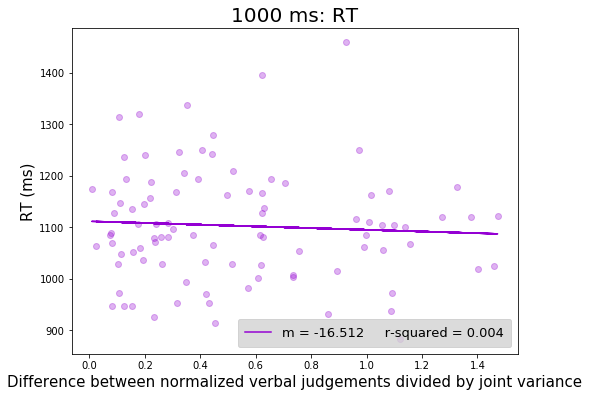

In [64]:
#run regression
plt.figure(figsize=[8,6])
JV_X_1000 = np.array(n_JV_1000).reshape(-1,1)
VE_PC_1000 = n_avg_RT_1000
JV_PC_reg_1000 = LinearRegression().fit(JV_X_1000, VE_PC_1000)

#Generated Predictions
JV_PC_predicted_1000 = JV_PC_reg_1000.predict(JV_X_1000)
#Plot Our Actual and Predicted Values
plt.plot(JV_X_1000, VE_PC_1000, 'o', color='darkviolet', alpha = 0.3);
plt.plot(JV_X_1000, JV_PC_predicted_1000,color='darkviolet', label = 'm = ' + str(round(JV_PC_reg_1000.coef_[0], 3))
         + '     r-squared = ' + str(round(float(JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000)), 3)))
plt.xlabel("Difference between normalized verbal judgements divided by joint variance", fontsize = 15)
plt.ylabel("RT (ms)", fontsize = 15)

#get coefficients and y intercept
print("m: {0}".format(JV_PC_reg_1000.coef_))
print("b: {0}".format(JV_PC_reg_1000.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", JV_PC_reg_1000.score(JV_X_1000, VE_PC_1000))


legend = plt.legend(loc = 4, fontsize = 13, borderpad = 0.6, labelspacing = 1)
legend.get_frame().set_facecolor('lightgray')

plt.title("1000 ms: RT", fontsize = 20)